Download some forest images (fire and non-fire). feed this image to your classifier and make a prediction. Finally, show the label of each image with its probability in the photo. If the photo was fire, with red color, otherwise green color

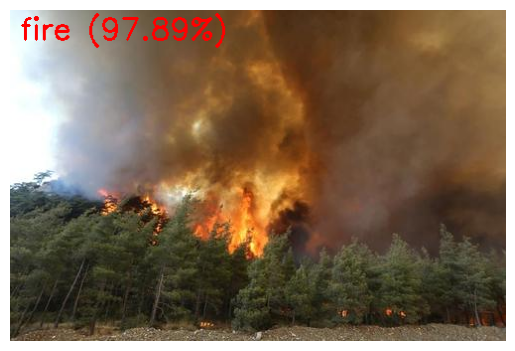

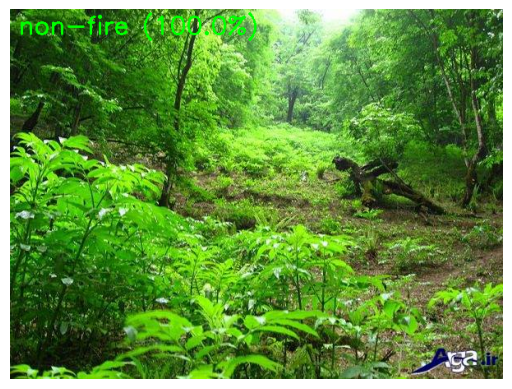

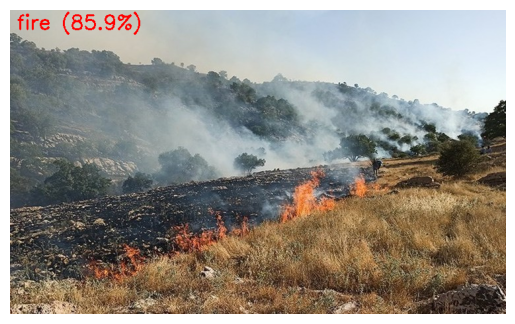

In [3]:
import cv2
from joblib import load
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load('best_model.joblib')

img_size = (64, 64)
# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image to the desired size
    image = cv2.resize(image, img_size)
    # Normalize the image
    image = image / 255.0
    # Return the preprocessed image
    return image

# Function to display the image with label and probability
def display_image(image, label, probability):
    # Determine the color for the label (red for fire, green for non-fire)
    color = (0, 0, 255) if label == 'fire' else (0, 255, 0)
    # Convert the probability to percentage
    probability_percent = round(probability * 100, 2)
    # Add the label and probability text to the image
    cv2.putText(image, f'{label} ({probability_percent}%)', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Process and predict new forest images
image_paths = ['resized_1244982_212.jpg', 'Photos-forest-6.jpg' , 'zagros-atash.jpg']

for image_path in image_paths:
    # Preprocess the image
    image = preprocess_image(image_path)
    # Reshape the image to match the model input shape
    image = np.reshape(image, (1, -1))
    # Predict the probabilities
    probabilities = model.predict_proba(image)
    # Get the predicted label (fire or non-fire)
    label = 'fire' if probabilities[0, 1] >= 0.5 else 'non-fire'
    # Get the predicted probability for the label
    probability = probabilities[0, 1] if label == 'fire' else probabilities[0, 0]
    # Display the image with label and probability
    display_image(cv2.imread(image_path), label, probability)
